# First data exploration for the school world exploration project

This notebook contains the pre-processing of our chosen data sets and some basic statistics to get insights about the data.
The overall project goal can be expressed as:

> Exploring global education through interactive visuals, revealing the diversity and disparities within school systems across urban and rural landscapes.

Data sets:
- [World Bank EdStats](https://datacatalog.worldbank.org/search/dataset/0038480/education-statistics)
- ...
 



In [1]:
import pandas as pd

## Load data

In [2]:
PATH = "./data/"

# Loading the EdStats data set from the World Bank
countries = pd.read_csv(PATH+ "EdStatsCountry.csv")
country_series = pd.read_csv(PATH+"EdStatsCountry-Series.csv")
data = pd.read_csv(PATH+"EdStatsData.csv")
foot_note = pd.read_csv(PATH+"EdStatsFootNote.csv")
series = pd.read_csv(PATH+"EdStatsSeries.csv")


In [3]:
# Print available attributes
def print_columns(df, df_name):
    print("\n" + df_name)
    print(df.columns)


print_columns(countries, "Countries")
print_columns(country_series, "Country Series")
print_columns(data, "Data")
print_columns(foot_note, "Foot Note")
print_columns(series, "Series")


Countries
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

Country Series
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')



**The 'Country Code' and 'Series Code' attributes can be used as ids accross the dfs to link data.**

Indicator Code       Country Code
BAR.NOED.1519.FE.ZS  ABW             0
                     AFG             9
dtype: int64

<Axes: >

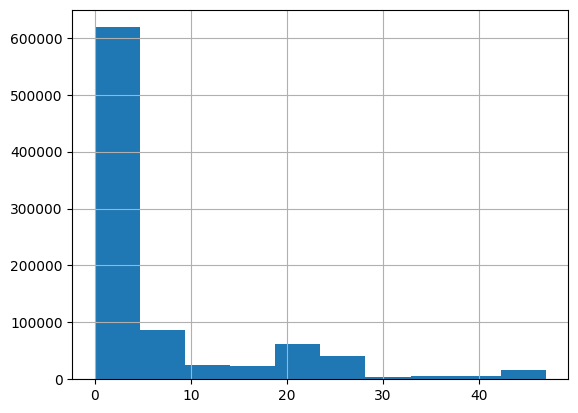

In [4]:
# Selecting data attributes with sufficient data points
number_of_years_with_data = data.groupby(["Indicator Code", "Country Code"]).count().sum(axis=1)-2
display(number_of_years_with_data.head(2))
number_of_years_with_data.sort_values(ascending=False).hist()

**If we choose to select only data for which there are > 18 years availlable**

In [5]:
#we want data that includes at least : USA, Mexico, Japan, India, and Switzerland
countries_code_we_want = ["USA", "MEX", "JPN", "IND", "CHE"]
countries[countries["Country Code"].isin(countries_code_we_want)]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
34,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2000",Yes,2008,2007.0,2012.0,2000,NaN
98,IND,India,India,Republic of India,IN,Indian rupee,Fiscal year end: March 31; reporting period fo...,South Asia,Lower middle income,IN,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2005/06","Integrated household survey (IHS), 2012",NaN,2011,2009.0,2012.0,2010,NaN
107,JPN,Japan,Japan,Japan,JP,Japanese yen,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,High income: OECD,JP,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Income survey (IS), 1993",Yes,2010,2010.0,2012.0,2001,NaN
141,MEX,Mexico,Mexico,United Mexican States,MX,Mexican peso,The new base year is 2008.,Latin America & Caribbean,Upper middle income,MX,...,Special Data Dissemination Standard (SDDS),2010,National Survey of Demographic Dynamics (ENADI...,"Integrated household survey (IHS), 2012",NaN,2007,2010.0,2012.0,2009,NaN
227,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2000",Yes,2012,2008.0,2012.0,2005,NaN


In [6]:
number_of_years_with_data_df = number_of_years_with_data.unstack(level=1)
number_of_years_with_data_df.head(2)

Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,0,9,0,9,0,0,9,9,9,0,...,0,9,0,0,0,0,9,9,9,9
BAR.NOED.1519.ZS,0,9,0,9,0,0,9,9,9,0,...,0,9,0,0,0,0,9,9,9,9


In [7]:
limit = 18
indicator_has_all_countries_wanted = (number_of_years_with_data_df[countries_code_we_want]>limit).all(axis=1)
indicators_with_countries_wanted = indicator_has_all_countries_wanted[indicator_has_all_countries_wanted].index.to_list()
print(len(indicators_with_countries_wanted))


647


In [8]:
indicators_df = data.loc[data["Indicator Code"].isin(indicators_with_countries_wanted), ["Indicator Code","Indicator Name"]].drop_duplicates().set_index("Indicator Code")
indicators_df["Number of Countries with sufficient data"] = (number_of_years_with_data_df>limit).sum(axis=1)
indicators_df["Cumuled number of years availlable"] = number_of_years_with_data_df.sum(axis=1)
indicators_df

,Indicator Name,Number of Countries with sufficient data,Cumuled number of years availlable
Indicator Code,,,
UIS.E.1.G1,"Enrolment in Grade 1 of primary education, bot...",188,7109
UIS.E.1.G1.F,"Enrolment in Grade 1 of primary education, fem...",180,6699
UIS.E.1.G2,"Enrolment in Grade 2 of primary education, bot...",185,7020
UIS.E.1.G2.F,"Enrolment in Grade 2 of primary education, fem...",177,6615
UIS.E.1.G3,"Enrolment in Grade 3 of primary education, bot...",186,7028
...,...,...,...
PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...,167,3173
PRJ.POP.ALL.1.MF,Wittgenstein Projection: Population in thousan...,167,3173
PRJ.POP.ALL.3.FE,Wittgenstein Projection: Population in thousan...,167,3173


In [9]:
data.loc[data["Indicator Code"].isin(indicators_with_countries_wanted), "Indicator Name"].unique()

array(['Enrolment in Grade 1 of primary education, both sexes (number)',
       'Enrolment in Grade 1 of primary education, female (number)',
       'Enrolment in Grade 2 of primary education, both sexes (number)',
       'Enrolment in Grade 2 of primary education, female (number)',
       'Enrolment in Grade 3 of primary education, both sexes (number)',
       'Enrolment in Grade 3 of primary education, female (number)',
       'Enrolment in Grade 4 of primary education, both sexes (number)',
       'Enrolment in Grade 4 of primary education, female (number)',
       'Enrolment in Grade 5 of primary education, both sexes (number)',
       'Enrolment in Grade 5 of primary education, female (number)',
       'Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Enrolment in primary education, both sexes (number)',
       'Enrolment in primary education, female (number)',
       'Enrolment in secondary education, 

we see there are multiple linked indicators. We will try to link them

In [10]:
indicators_df["Group"] = indicators_df.index.str.split(".", n=3).to_list()
indicators_df["Group"] = indicators_df.Group.apply(lambda x : ".".join(x[:3]))
indicators_df


,Indicator Name,Number of Countries with sufficient data,Cumuled number of years availlable,Group
Indicator Code,,,,
UIS.E.1.G1,"Enrolment in Grade 1 of primary education, bot...",188,7109,UIS.E.1
UIS.E.1.G1.F,"Enrolment in Grade 1 of primary education, fem...",180,6699,UIS.E.1
UIS.E.1.G2,"Enrolment in Grade 2 of primary education, bot...",185,7020,UIS.E.1
UIS.E.1.G2.F,"Enrolment in Grade 2 of primary education, fem...",177,6615,UIS.E.1
UIS.E.1.G3,"Enrolment in Grade 3 of primary education, bot...",186,7028,UIS.E.1
...,...,...,...,...
PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP.ALL
PRJ.POP.ALL.1.MF,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP.ALL
PRJ.POP.ALL.3.FE,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP.ALL


## Visual exploration 
The [World Bank]() website was use to explore big chuncks of the data set. Indeed, the data set contains very rich but sparse data accross **XXX** countries, over **XXX** years for **XXX** categories of data. This notebook explores the data related to the following key features selected from the world bank website. 

- feature 1
- feature 2
- ...


In [11]:
# TODO explore data youpi !
# idea of things to look at
# for numerical var:
    # histograms, box plots, scatter plots, correlation matrices... 
# for categorical var:
    # bar charts ...
# basic stats on data
# get insight on distribution, outliers ect.


## Draft pieces of code (to remove in the end)

In [12]:
attendanceF = data[data["Indicator Code"] == "HH.DHS.NAR.1.F"]

In [13]:
subset = attendanceF.dropna(subset=['2002','2003','2004','2005'], how='all')

In [14]:
subset[['Country Name','2002','2003','2004','2005']].head()

,Country Name,2002,2003,2004,2005
121515,Armenia,NaN,NaN,NaN,98.246757
147170,Bangladesh,NaN,NaN,84.883621,NaN
176490,Bolivia,NaN,82.205487,NaN,NaN
202145,Burkina Faso,NaN,28.879824,NaN,NaN
213140,Cambodia,NaN,NaN,NaN,76.633008
